# Lab 4: Vector Data and Regressions Part 2

In this lab, you will work with various vector datasets using common spatial data analysis tools to create visually compelling maps. Throughout the lab, you will:

- Reproject Data: Convert data to different coordinate reference systems (CRS) so that various datasets can align properly.
- Understand `datetime` objects.
- Learn how to use loops to create frames to animate a map time series.
- `Clip` and `Dissolve` geospatial data.
- Regression Analysis: Explore both multiple linear and nonlinear regression models applied to different datasets.

References:

- [Clip vector data in Python with GeoPandas and Shapely](https://www.earthdatascience.org/courses/earth-analytics-python/spatial-data-vector-shapefiles/clip-vector-data-in-python-geopandas-shapely/)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import pandas as pd
import cartopy.feature as cfeature

%matplotlib inline

## Simple Loops

Loops are fundamental constructs in programming that allow for the repeated execution of a block of code, reducing redundancy and enhancing efficiency. In Python, the two primary loop structures are `for` loops and `while` loops.

### `For` loop
A `for` loop in Python iterates over a sequence (such as a list, tuple, or range), executing a block of code for each element in the sequence.

In [3]:
for i in range(10):  # Iterates over a sequence of numbers from 0 to 9
    print(i)         # Prints the current value of i

0
1
2
3
4
5
6
7
8
9


### `While` loop

A `while` loop continues to execute a block of code as long as a specified condition remains true.

Here, the loop starts with `i` equal to 0 and continues to execute as long as `i` is less than 5. Within the loop, it prints the current value of `i` and then increments `i` by 1 in each iteration.

In [4]:
i = 0
while i < 5:       # Continues looping as long as i is less than 5
    print(i)       # Prints the current value of i
    i += 1         # Increments i by 1

0
1
2
3
4


Python's `for` loop can also iterate directly over elements in a collection, such as a list.

In [5]:
my_list = ['foo', 'bar', 'fizz', 'buzz']
for item in my_list:
    print(item)  # Prints each element in my_list

foo
bar
fizz
buzz


## Reprojecting, Clipping, and Dissolving Vector Data

For this exercise, we will work with the MODIS fire detection dataset from NASA FIRMS (Fire Information for Resource Management). You can read more about this dataset here:

- [NASA FIRMS](https://firms2.modaps.eosdis.nasa.gov/)

These data represent point observations of thermal anomalies (i.e. regions with extremely high temperatures) detected by the MODIS satellite, which scans the entire Earth every 24 hours. The dataset is stored as a **shapefile**, containing both spatial coordinates and detection times.

Below, we open the shapefile using `GeoPandas` and quickly inspect and visualize the data. `GeoPandas` extends the datatypes used by pandas to allow spatial operations on geometric types. It is essential for reading, writing, and analyzing spatial data in Python. Using `Cartopy` with `GeoPandas` allows you to combine quick spatial plots with customizable map projections.

In [6]:
# Read the shapefile using geopandas.
# This loads the vector data (points representing fire detections) into a GeoDataFrame.
fires23 = gpd.read_file('data/FireData2023/fire_archive_M-C61_36415.shp')
# Check and print the Coordinate Reference System (CRS) of the dataset.
print("Coordinate Reference System (CRS):", fires23.crs)

Coordinate Reference System (CRS): EPSG:4326


In [7]:
# Display a summary of the dataset.
display(fires23)

# Since we loaded the dataset with geopandas, what type is it?
type(fires23)

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,56.0106,-119.4538,307.5,1.0,1.0,2023-04-02,0511,Terra,MODIS,72,61.03,269.3,14.3,N,0,POINT (-119.45 56.011)
1,54.1863,-125.8052,300.4,1.7,1.3,2023-04-04,2157,Aqua,MODIS,23,61.03,273.7,16.1,D,0,POINT (-125.81 54.186)
2,54.1887,-125.7976,302.3,1.7,1.3,2023-04-04,2157,Aqua,MODIS,39,61.03,273.7,20.1,D,0,POINT (-125.8 54.189)
3,55.6994,-118.9134,304.3,1.1,1.0,2023-04-05,1904,Terra,MODIS,58,61.03,271.5,11.3,D,0,POINT (-118.91 55.699)
4,55.6966,-118.8969,300.3,1.1,1.0,2023-04-05,1904,Terra,MODIS,34,61.03,271.2,8.7,D,0,POINT (-118.9 55.697)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321321,58.4230,-116.3948,312.1,1.6,1.2,2023-10-31,2120,Aqua,MODIS,72,61.03,271.8,30.9,D,0,POINT (-116.39 58.423)
321322,54.9244,-124.7014,315.6,1.0,1.0,2023-10-31,2120,Aqua,MODIS,53,61.03,271.3,17.8,D,0,POINT (-124.7 54.924)
321323,54.9218,-124.7169,385.7,1.0,1.0,2023-10-31,2120,Aqua,MODIS,100,61.03,278.8,189.7,D,0,POINT (-124.72 54.922)
321324,54.9306,-124.7212,338.5,1.0,1.0,2023-10-31,2120,Aqua,MODIS,89,61.03,271.3,46.4,D,0,POINT (-124.72 54.931)


geopandas.geodataframe.GeoDataFrame

<Axes: >

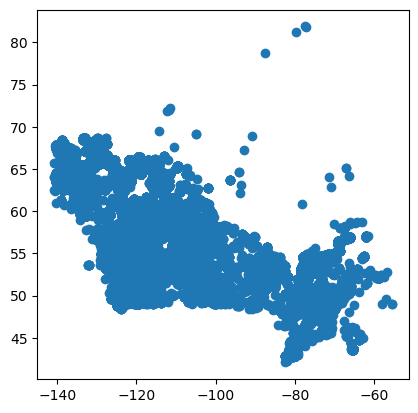

In [8]:
# Quickly visualize the spatial distribution of the fire detection data.
# GeoPandas' built-in plot() function is useful for a fast, initial inspection.
fires23.plot()

So these data cover all of Canada from 01 April to 31 October 2024. We are interested in only the fires that occurred in British Columbia, so how can we isolate those points that occurred in BC? 

*Solution:* We can import the shapefile of BC, and *clip* the data using the `geometry` attributes of both shapefiles! A shapefile for the province of BC exists in your data folder, so let's open that and take a look at the CRS:

<Axes: >

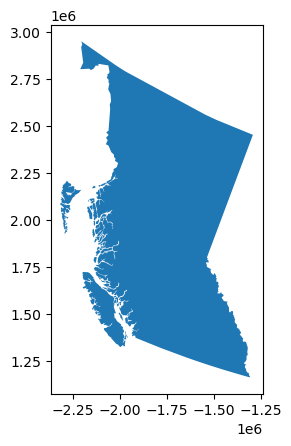

In [9]:
BC = gpd.read_file('data/BC/BC.shp')
BC.plot()

### Reprojection
Before any spatial operations, it’s important to ensure that the datasets you want to work with are in the same CRS. In the code below, we print and compare the CRS of the fire data and the province (BC) shapefile.

A mismatched CRS means that the spatial units differ (e.g., degrees vs. meters), which prevents accurate spatial operations like clipping or overlay analysis.

In [10]:
# Print the CRS of the fire data (fires23) and the BC province shapefile.
print('Fires CRS: ' + str(fires23.crs))
print('BC CRS: ' + str(BC.crs))

# Check if both shapefiles have the same CRS.
# This returns a Boolean: True if they match, False otherwise.
print("Do the shapefiles share the same CRS?", BC.crs == fires23.crs)


Fires CRS: EPSG:4326
BC CRS: PROJCS["Canada_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",50],PARAMETER["standard_parallel_2",70],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102001"]]
Do the shapefiles share the same CRS? False


Since the fire dataset is in WGS84 (EPSG:4326) and the BC shapefile is in a custom Albers Equal Area projection, we need to reproject the BC data to match the fire data’s CRS. This ensures that both datasets share the same spatial units.

Always confirm the new CRS after reprojection. This helps prevent mistakes when performing further spatial operations.

In [11]:
# Reproject the BC shapefile from its current CRS to EPSG:4326 (WGS84)
# The to_crs() method is used to convert the CRS.
BC_geodetic = BC.to_crs(epsg=4326)

# Print the new CRS to confirm the change.
print(BC_geodetic.crs)

# Verify that the reprojected BC data now shares the same CRS as the fire dataset.
print("Do the shapefiles share the same CRS?", BC_geodetic.crs == fires23.crs)

EPSG:4326
Do the shapefiles share the same CRS? True


After ensuring both datasets share the same CRS, we extract the geographic extent (bounding box) of the BC province and use it to set the plotting extent. We then plot the fire detections and overlay the BC boundaries.

Min X: -138.93859863281253, Min Y: 48.301101794599724
Max X: -114.03530409125469, Max Y: 60.00386810302734


Text(0.5, 1.0, 'MODIS Fire Detections\nApril - October 2024')

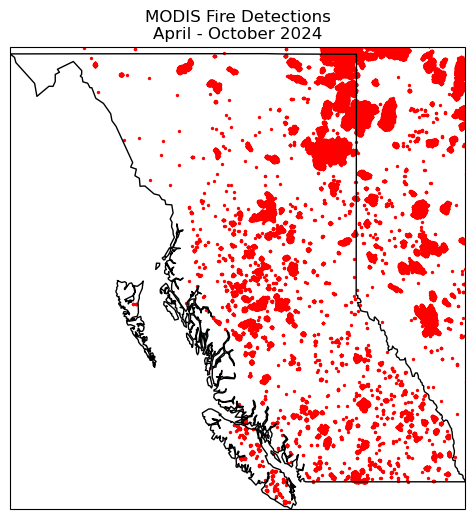

In [12]:
# Extract the bounding coordinates (minx, miny, maxx, maxy) of the reprojected BC shapefile.
minx, miny, maxx, maxy = BC_geodetic.total_bounds
print(f"Min X: {minx}, Min Y: {miny}")
print(f"Max X: {maxx}, Max Y: {maxy}")

# Create a new figure with a specified size.
plt.figure(figsize=(10, 6))

# Create a Cartopy axes object using the Plate Carree projection (suitable for WGS84 data).
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the plot extent (longitude and latitude) using the BC shapefile bounds.
ax.set_extent([minx, maxx, miny, maxy])

# Plot the fire detections on the same axes.
# 'fires23' is assumed to be in EPSG:4326.
fires23.plot(ax=ax, color='red', markersize=2)

# Overlay the BC boundaries.
# Here, we add geometries from the BC_geodetic GeoDataFrame.
ax.add_geometries(
    BC_geodetic.geometry,
    facecolor='none',   
    edgecolor='black',  # Black outline for the province boundaries.
    crs=ccrs.PlateCarree()
)

# Set a title for the plot.
plt.title('MODIS Fire Detections\nApril - October 2024')

### Clipping vector data

<img src='images/vector-clip.png'>

Method using `geopandas.clip()`:

We will use the `geopandas.clip(arg1, arg2)` function, where `arg1` is the vector data that we want to clip, and `arg2` is the polygon that we will use for clipping.

In [13]:
# 'fires23' is the fire dataset, and 'BC_geodetic' is the polygon to clip to.
BC_fires23 = gpd.clip(fires23, BC_geodetic)

The resulting GeoDataFrame, `BC_fires23`, contains only fires that intersect the BC polygon. Let's visualize this with a map:

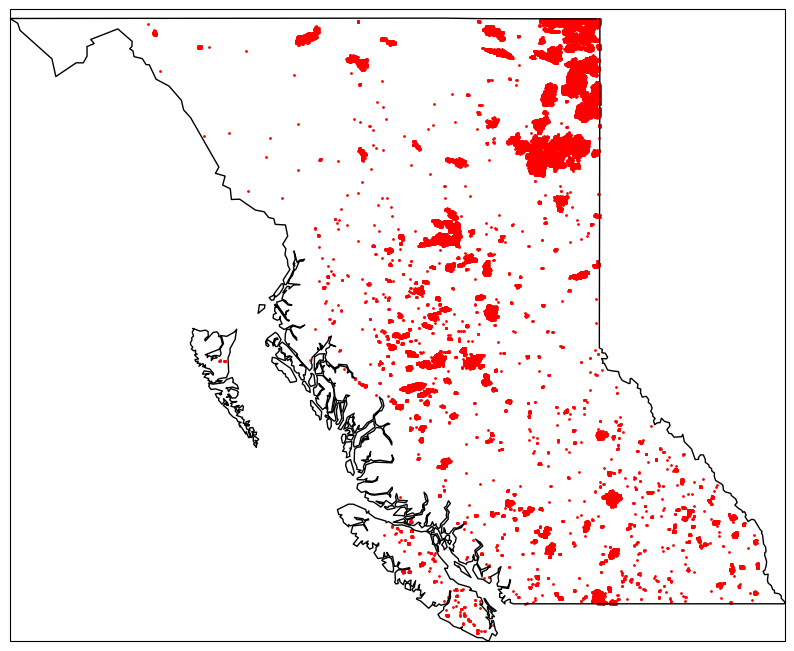

In [14]:
# Create a new figure for the web map.
plt.figure(figsize=(10, 10))

# Create Cartopy axes using the PlateCarree projection.
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the plot extent using the same bounds extracted earlier.
ax.set_extent([minx, maxx, miny, maxy])

# Plot the reprojected fire points.
BC_fires23.plot(ax=ax, color='red', markersize=1)

# Overlay the BC boundaries.
ax.add_geometries(
    BC_geodetic.geometry,
    facecolor='none',   
    edgecolor='black',
    crs=ccrs.PlateCarree()
)

The fire dataset includes an attribute called **fire radiative potential** (FRP), which is an estimate of the fire’s power (in megawatts). We’ll first explore its distribution using a histogram and then create a color-coded map to visualize varying FRP levels.

Text(0.5, 1.0, 'Histogram of FRP Values')

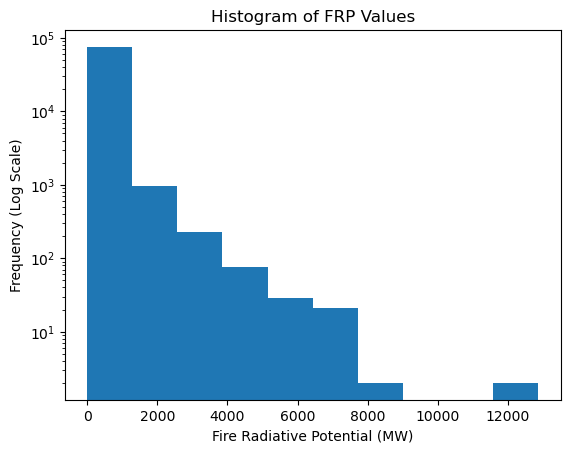

In [15]:
# Create a figure for the histogram.
plt.figure()

# Plot a histogram of the FRP values.
# The log=True argument is used to apply a logarithmic scale on the y-axis for better visualization of skewed data.
plt.hist(BC_fires23.FRP, log=True)
plt.xlabel("Fire Radiative Potential (MW)")
plt.ylabel("Frequency (Log Scale)")
plt.title("Histogram of FRP Values")

Text(0.5, 1.0, 'BC Fire Radiative Potential\n2023')

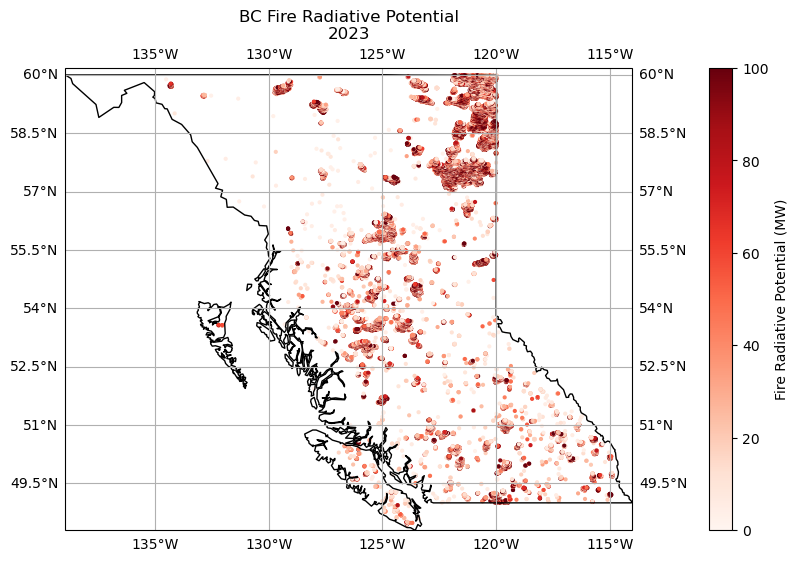

In [16]:
# Thematic maps that color-code based on an attribute (like FRP) help reveal spatial patterns and hotspots.
plt.figure(figsize=(10, 6))

# Create Cartopy axes with the PlateCarree() projection.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minx, maxx, miny, maxy])

# Add gridlines for reference.
ax.gridlines(draw_labels=True)

# Plot using GeoPandas, color-coded by FRP. 
# In this example, we use the `legend_kwds`` parameter in GeoPandas’ plot() method to control aspects such as the padding and labelling of the colorbar.
BC_fires23.plot(
    ax=ax,
    column='FRP',
    markersize=4,
    cmap='Reds',
    vmin=0, vmax=100,
    transform=ccrs.PlateCarree(),
    legend=True,
    legend_kwds={'pad': 0.1, 'label': "Fire Radiative Potential (MW)"}
)

# Add BC boundaries.
ax.add_geometries(
    BC_geodetic.geometry,
    facecolor='none',   
    edgecolor='black', 
    crs=ccrs.PlateCarree()
)

plt.title('BC Fire Radiative Potential\n2023')

**Exercise 1:** The thematic map above is created by combining different Python libraries, each serving a distinct purpose. In a `Markdown` cell, identify the different libraries used in the code above and briefly explain the primary role of each in creating the final figure. 

*Hint: There are three different libraries being used.*

**Exercise 2:** Play around with this map. Change the colormap (cmap) to `Blues`, `Greens`, or (oooo) `plasma`. If I wanted to not show the lat/long gridlines, how would I change the above code to show grid labels, but not lines?

*Hint: Assign `ax.gridlines()` to a `gl` object ([documentation here](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.gridliner.Gridliner.html#cartopy.mpl.gridliner.Gridliner))*

### Dissolving vector data
<img src='images/dissolve-polygons-esri.gif'>

The `dissolve` function in GeoPandas is a tool for aggregating geometries based on a common attribute. In the provided example, the Vancouver local planning areas are visualized, and the goal is to merge these areas based on a shared characteristic.



<Axes: >

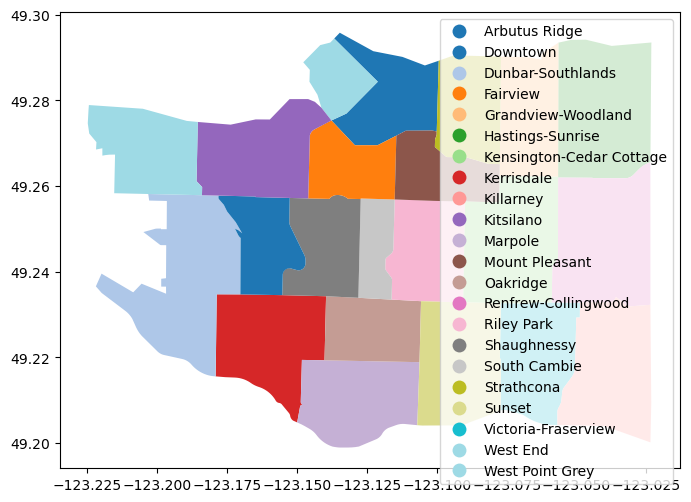

In [17]:
bounds = gpd.read_file('data/local-area-boundary/local-area-boundary.shp')

bounds.plot(categorical=True, column='name', cmap='tab20', legend = True, figsize=(8,6))

The problem here is that there is no common attribute to dissolve the features by. We can fix that by simply adding a new column: 

In [18]:
bounds['dissolveby'] = 1                       # add a dummy column of ones
bounds

,name,geometry,dissolveby
0,Downtown,"POLYGON ((-123.11 49.29, -123.1 49.288, -123.1...",1
1,Hastings-Sunrise,"POLYGON ((-123.06 49.293, -123.05 49.294, -123...",1
2,Kerrisdale,"POLYGON ((-123.18 49.216, -123.18 49.235, -123...",1
3,Marpole,"POLYGON ((-123.11 49.204, -123.11 49.204, -123...",1
4,Oakridge,"POLYGON ((-123.11 49.233, -123.11 49.219, -123...",1
5,Riley Park,"POLYGON ((-123.11 49.233, -123.12 49.233, -123...",1
6,South Cambie,"POLYGON ((-123.12 49.238, -123.12 49.233, -123...",1
7,Shaughnessy,"POLYGON ((-123.16 49.235, -123.16 49.239, -123...",1
8,Victoria-Fraserview,"POLYGON ((-123.06 49.204, -123.06 49.204, -123...",1
9,Dunbar-Southlands,"POLYGON ((-123.17 49.248, -123.17 49.235, -123...",1


In [19]:
bounds_ds = bounds.dissolve(by='dissolveby')   # dissolve the dataset by the new column
bounds_ds

,geometry,name
dissolveby,,
1,"POLYGON ((-123.11 49.204, -123.11 49.204, -123...",Downtown


<Axes: >

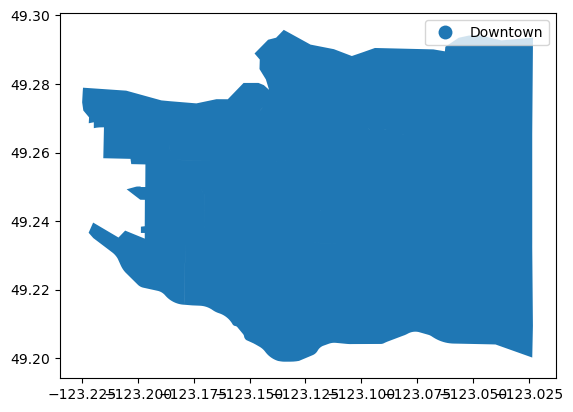

In [20]:
bounds_ds.plot(categorical=True, column='name', legend=True)

## Dates and Times with `datetime`

Spatial data often includes date and time information that can be used to analyze trends over time. Since we’re working with `pandas` and `GeoPandas` dataframes, converting a date given as a string (e.g. `'2024-04-10'`) to a Python `datetime` object is straightforward using the pandas function `to_datetime`. This conversion allows us to easily extract specific components like the year, month, day, and day of the year for further analysis.

In [21]:
# Convert the date string (from the 'ACQ_DATE' column) to a datetime object.
# This enables us to perform date/time operations on the data.
firedates = pd.to_datetime(fires23['ACQ_DATE'])

# Display the first few datetime entries to verify the conversion.
firedates.head()

0   2023-04-02
1   2023-04-04
2   2023-04-04
3   2023-04-05
4   2023-04-05
Name: ACQ_DATE, dtype: datetime64[ms]

Once the date strings are converted to datetime objects, we can extract various elements of the date (e.g., year, month, day, day of year, weekday, hour, etc.) with the `.dt` accessor.

In [22]:
# Extract the month, day, and day of year from the datetime series.
month = firedates.dt.month       # Month (1-12)
day   = firedates.dt.day         # Day of the month (1-31)
doy   = firedates.dt.dayofyear   # Day of the year (1-366)

Once you have your datetime components, filtering the dataframe for specific conditions is straightforward. For example, you can easily count the number of fire events that occurred in July or on a specific day.

Remember: 
- When filtering, the Boolean conditions (e.g., `month == 10`) are used to index the original dataframe, returning only those rows that meet the criteria.
- `len()` returns the number of rows in the dataframe, or fire observations in this case.

In [23]:
# Count the number of fire observations that occurred in October.
num_fires_in_oct = len(fires23[month == 10])
print("Number of fires in October:", num_fires_in_oct)

# Count the number of fire observations on October 1st.
num_fires_oct1 = len(fires23[(month == 10) & (day == 1)])
print("Number of fires on October 1st:", num_fires_oct1)

Number of fires in October: 2105
Number of fires on October 1st: 198


Next, we create a loop that goes through each day of the fire season (from the earliest to the latest day) and calculates the total number of fire events for each day. This involves:

1. Creating an empty list `[]` to store the results.
2. Calculating the minimum and maximum day of year (DOY) in the dataset.
3. Creating a sequence of DOY values that ranges from DOY min to DOY max.
4. Looping through each DOY, filtering the data, and using the `append` function to add the count of fire events to the list.

In [24]:
# Step 1: Create an empty list to store the daily fire counts.
fires23_DOY = []

# Step 2: Determine the minimum and maximum day of year from the 'doy' series.
mindoy = doy.min()
maxdoy = doy.max()

# Step 3: Create a sequential array of DOY values from mindoy to maxdoy.
doyrange = np.arange(mindoy, maxdoy + 1)  # Include the last day

# Step 4: Loop through each day in the DOY range, filter the fire observations, and count them.
for i in doyrange:
    # Filter fire data for the current day of year.
    fires_on_day = fires23[doy == i]
    # Append the count of fires to the list.
    fires23_DOY.append(len(fires_on_day))

print(month)

0          4
1          4
2          4
3          4
4          4
          ..
321321    10
321322    10
321323    10
321324    10
321325    10
Name: ACQ_DATE, Length: 321326, dtype: int32


Code breakdown:

- **Empty List**: We start with an empty list, `fires23_DOY`, to store the count for each day.
- **Bounds:** We find the minimum and maximum DOY values to define the time range.
- **Looping:** For each day in this range, we filter the dataframe using `fires23[doy == i]` and count the number of fire events.

Additional information regarding this line:

`doyrange = np.arange(mindoy, maxdoy + 1)`

In NumPy, the arange function generates values which includes the start value but excludes the stop value. This means that the sequence produced will stop just before reaching the stop value. To ensure that the endpoint is included in the generated sequence in cases where the step size is 1, adding 1 to the stop value effectively includes the last integer, or date in this context, in the sequence. 

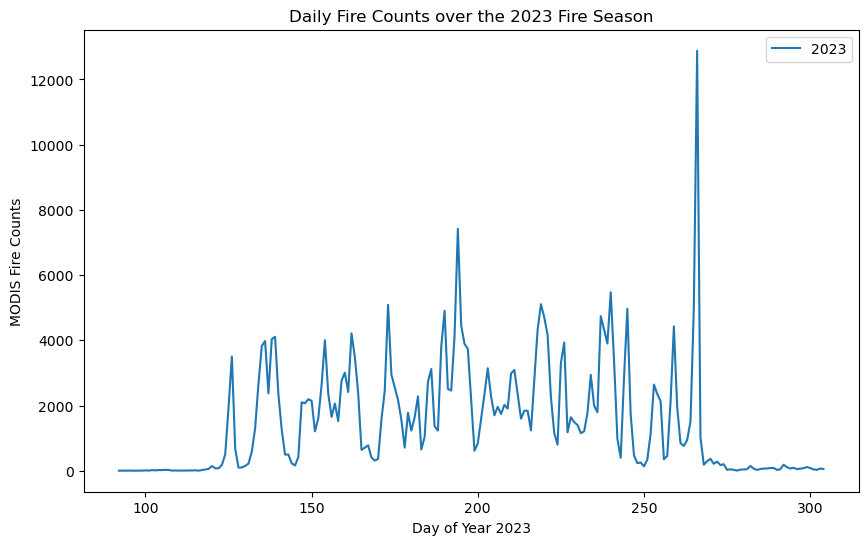

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(doyrange, fires23_DOY, label='2023')
plt.xlabel('Day of Year 2023')
plt.ylabel('MODIS Fire Counts')
plt.title('Daily Fire Counts over the 2023 Fire Season')
plt.legend()

## Multiple Linear Regression (MLR)

MLR is a statistical technique that models the relationship between one dependent variable and two or more independent variables. This method allows us to understand how multiple factors collectively influence an outcome and to predict the value of the dependent variable based on known values of the independent variables. For example, MLR can be used to assess how factors like rainfall, temperature, and fertilizer amount affect crop yield. 

Key Considerations:

- Assumptions: MLR assumes linearity between dependent and independent variables, independence of observations, homoscedasticity (constant variance of errors), and that the residuals (errors) of the model are normally distributed.

- Overfitting: Including too many predictors can lead to overfitting, where the model captures noise rather than the underlying relationship, resulting in misleadingly high R² values and less reliable predictions.

- Adjusted R²: Unlike R², which always increases with additional predictors, the adjusted R² accounts for the number of predictors in the model and increases only if the new predictors improve the model more than would be expected by chance. 


### MLR with the California Housing Dataset
The California Housing dataset contains information from the 1990 U.S. Census, including features such as median income, housing average age, average rooms, average bedrooms, population, average occupation, latitude, and longitude. The target variable is the median house value for California districts.

Objective: Predict the median house value in various California districts based on available features using Multiple Linear Regression.

*Note: This sample dataset caps `MedHouseVal` at `5.0` ($500,000) to mitigate skewness of outliers.*

#### Step 1: Load the dataset

First, load the dataset using `fetch_california_housing`. Setting `as_frame=True` ensures the data is loaded as a Pandas DataFrame, which makes it easier to explore and manipulate.

In [26]:
from sklearn.datasets import fetch_california_housing

# Load the dataset as a Pandas DataFrame
california = fetch_california_housing(as_frame=True)
df = california.frame  # Access the DataFrame from the loaded object
print(df.head())       # Display the first few rows of the DataFrame
print(type(df))        # Confirm the data is loaded as a Pandas DataFrame


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>


**Exercise 3:** Use a for loop to create plots of `MedHouseVal` vs the other variables to see the relationships between each of those independent variables against the dependent variable Median House Value. 

#### Step 2: Identify Independent and Dependent Variables

We need to separate the dataset into features (independent variables) and the target (dependent variable). The column `'MedHouseVal'` represents the median house value, which is our target.

`drop(columns='MedHouseVal')` removes the target column, leaving only the predictors.

In [27]:
# Split into independent (X) and dependent (y) variables
X = df.drop(columns='MedHouseVal')  # Features (all columns except 'MedHouseVal')
# Recall that we do not need to .reshape() this time as the independent variables data are already a 2D array
y = df['MedHouseVal']               # Target variable

#### Step 3: Split the data 

To evaluate the model, split the data into training and testing sets. **Training data** is used to build the model, while **testing data** evaluates its performance.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Code breakdown - what's happening here?

- `X_train, X_test, y_train, y_test`: Assigns training and testing sets. These variables are assigned the output of the `train_test_split()` function. Specifically:
    - `X_train` and `y_train` contain the training data for the features and target variable, respectively.
    - `X_test` and `y_test` contain the testing data for the features and target variable, respectively.
- `test_size=0.2`: Reserves 20% of the data for testing.

Remember: For more information on a function, type `function_name?` in your notebook.

#### Step 4: Train the Model

Now, import `LinearRegression` and train the model using the training data. `fit()` trains the model by learning the relationship between `X_train` and `y_train`.

In [29]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Step 5: Make Predictions

Use the trained model to predict values for the test data. `predict()` generates predictions for the input features in `X_test`.

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### Step 6: Evaluate and Interpret the Model

Assess the model’s performance using metrics Mean Squared Error (MSE) and R-squared (R²). This time we calculate R² by calling the function `r2_score` from `sklearn.metrics`. In Lab 3, we used a different method and called directly from the model. Both are valid methods.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5876611697496805
R-squared: 0.5724466677901615


- MSE: Measures the average squared difference between predicted and actual values (lower is better).
- R²: Indicates how well the model explains the variance in the target variable. This is not adjusted R². For adjusted R², you’d need a custom calculation.

The coefficients tell us how each feature influences the target variable. Positive coefficients indicate a direct relationship, while negative ones suggest an inverse relationship. Large coefficients suggest strong relationships, but be cautious of multicollinearity (beyond the scope of this lab).

In [32]:
# Examine model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)

      Feature  Coefficient
0      MedInc     0.435127
1    HouseAge     0.009099
2    AveRooms    -0.099110
3   AveBedrms     0.593549
4  Population    -0.000002
5    AveOccup    -0.008500
6    Latitude    -0.418367
7   Longitude    -0.432015


#### Step 7: Visualize Predicted vs. Actual Values

Visualizing the model's predictions against the actual values helps assess its performance. A perfect model would have all points lying on the line $y = x$. Deviations from this line indicate prediction errors.

Text(0.5, 1.0, 'Actual vs. Predicted Values')

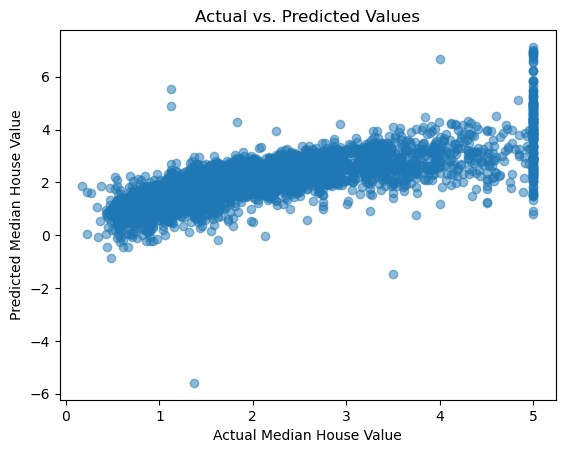

In [33]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Values')

##### Extra: Calculate Adjusted R²
While R² indicates the proportion of variance explained by the model, it can be misleading when comparing models with different numbers of predictors. Adjusted R² accounts for the number of predictors and provides a more accurate measure of model performance.
$$\text{Adjusted } R^2 = 1 - (1 - R^2) \times \frac{n - 1}{n - p - 1}$$


In [34]:
# Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Number of observations and predictors
n = X_test.shape[0]
p = X_test.shape[1]

# Calculate R² on the test set
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R²
adj_r2 = adjusted_r2(r2, n, p)

print(f'Adjusted R-squared: {adj_r2}')

Adjusted R-squared: 0.5716162655911621


## Nonlinear Regression

Pearson’s correlation coefficient assumes that the dataset’s relationship can be summarized as a straight line of best fit.
Not all relationships necessarily are that simple. 
Example: the relationship between property price and the amount of green space appears U-shaped. 

Linearity assumes that the mathematical relationship between variables can be fit with a straight line.

Non-linear (Curvilinear) is where the mathematical relationship between variables can be fit with non-straight lines.

### Nonlinear Quadratic Regression with the Keeling Curve
The Keeling Curve represents the concentration of atmospheric CO₂ measured at Mauna Loa Observatory in Hawaii since 1958. This dataset exhibits a clear upward trend with seasonal fluctuations, making it an excellent candidate for polynomial regression analysis. A simple linear model (degree 1) fits a straight line. However, many real-world relationships are curved. By including 2 degrees ($x^2$), the model can account for curvature in the data.

Objective: Fit a polynomial regression model to the Keeling Curve data to capture the underlying trend and seasonal variations.

#### Step 1: Load the Dataset

Begin by importing the necessary libraries and loading the dataset into a Pandas DataFrame.

In [35]:
# Load the dataset
df = pd.read_csv('data/co2_mm_mlo.csv', delimiter=',', skiprows=40)

# Display the first few rows to understand the structure
print(df.head())

   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99


#### Step 2: Identify Independent (X) and Dependent (y) Variables

In [36]:
# Predictor/Independent (X) and target/Dependent (y)
# Here 'decimal date' is used as the predictor
X = df['decimal date'].values.reshape(-1, 1) # Convert decimal date to a 2D array for fitting regression
y = df['average'] # Target/dependent variable

#### Step 3: Fit Polynomial Regression Models

Here we create a polynomial expansion of the input feature. You can choose the degree of the polynomial (for instance, 2 or 3). A higher degree might capture the nonlinearity better, but be careful of overfitting.

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (e.g., degree 2 for quadratic regression)
poly = PolynomialFeatures(degree= 2)
X_poly = poly.fit_transform(X)
print("Original feature shape:", X.shape)
print("Transformed features shape:", X_poly.shape)

Original feature shape: (802, 1)
Transformed features shape: (802, 3)


Code breakdown:
- `PolynomialFeatures(degree=2)`
    - This creates an instance of a transformer that will generate new features based on your original predictor(s). For a single feature, degree 2 means it will produce three columns:
        1. A column of ones (the bias term),
        2. The original feature $x$, and
        3. The square of the feature $x^2$.

- `poly.fit_transform(X)`
    - The `fit_transform` method does two things: it "fits" the transformer and then "transforms" your original 1D predictor array into a 2D array of polynomial features. For example, `X` has shape $(n,1)$, then with degree 2 the transformed array will have shape $(n,3)$.

#### Step 4: Fit a Linear Regression Model

Using the transformed features, fit a linear regression model. Even though we are using a “linear” model, the nonlinearity is introduced by the polynomial features.

In [38]:
from sklearn.linear_model import LinearRegression

# Fit the regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

#### Step 5: Evaluate the Model

A simple evaluation using Mean Squared Error (MSE) can help assess the fit. MSE calculates the average of the squared differences between the actual and predicted values. Since the differences are computed using the original `y` values, the MSE is expressed in the squared units of `y`.

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.3f} ppm²')

# Compute R² using the model's .score() method
r2 = r2_score(y, y_pred)
print(f'R² Score: {r2:.3f}')

Mean Squared Error: 4.968 ppm²
R² Score: 0.995


#### Step 6: Plot the Results

Plot the original data points and the polynomial regression curve.

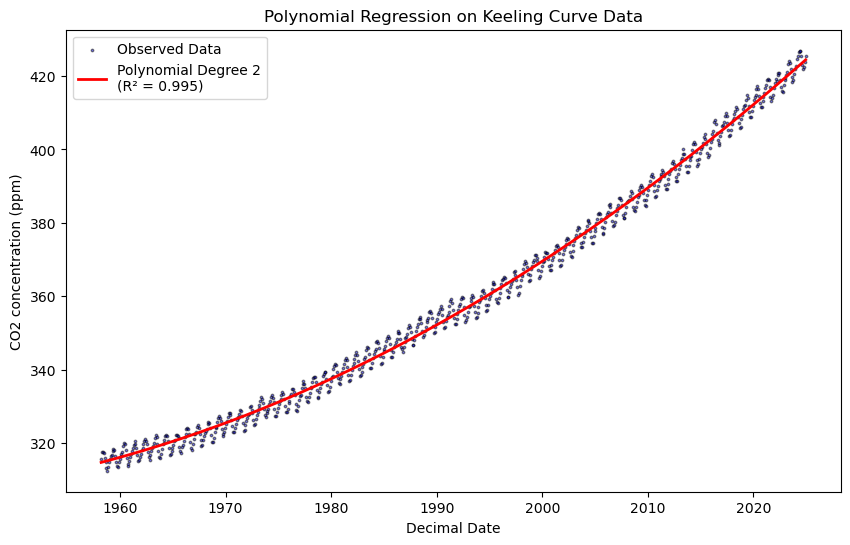

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=3, alpha=0.5, edgecolors='black', label='Observed Data')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Polynomial Degree 2\n(R² = {r2:.3f})')
plt.xlabel('Decimal Date')
plt.ylabel('CO2 concentration (ppm)')
plt.title('Polynomial Regression on Keeling Curve Data')
plt.legend()

**Exercise 4:** At this point we have created an array of predicted CO2 values `y_pred`. Remember from your previous labs that we can use indexing to find values in a certain position within an array. To find the index value from our time array `X`, we can use: `np.argmin(np.abs(X-YearInQuestion))`. 

Use this to print the predicted values of CO2 for 1960, 1990, and 2020. 


In [41]:
# Find the index for the year 1960
index_1960 = np.argmin(np.abs(X - 1960))
# Find the index for the year 1990
index_1990 = np.argmin(np.abs(X - 1990))
# Find the index for the year 2020
index_2020 = np.argmin(np.abs(X - 2020))

# Print the predicted CO2 values for 1960, 1990, and 2020
print(f'Predicted CO2 for 1960: {y_pred[index_1960]:.3f} ppm')
print(f'Predicted CO2 for 1990: {y_pred[index_1990]:.3f} ppm')
print(f'Predicted CO2 for 2020: {y_pred[index_2020]:.3f} ppm')

Predicted CO2 for 1960: 316.117 ppm
Predicted CO2 for 1990: 352.099 ppm
Predicted CO2 for 2020: 412.104 ppm


# End of Lab 4